#  MSDS 689 DATA STRUCTURES AND ALGORITHMS
## HW kmeans
### AUTHOR : *Emre Okcular*

In this notebook, you can find kmeans++ implementation and various examples for clustering. Clustering is a Machine Learning technique that involves the grouping of data points.

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.

There are 3 steps:

* Initialisation – K initial “means” (centroids) are generated at random
* Assignment – K clusters are created by associating each observation with the nearest centroid
* Update – The centroid of the clusters becomes the new mean

Assignment and Update are repeated iteratively until convergence

The end result is that the sum of squared errors is minimised between points and their respective centroids.

In [10]:
import numpy as np

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from kmeans import * # Implemented by me.

[[-0.2185273  -0.18710687]
 [ 0.41164261  0.35390689]]


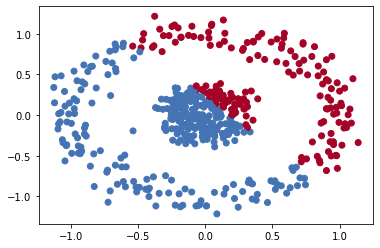

<Figure size 432x288 with 0 Axes>

In [11]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2, centroids='kmeans++')
print(centroids)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()
plt.savefig("nested-kmeans.png", dpi=200)

In [12]:
import numpy as np
from kmeans import *

grades = [92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65, 92.86, 85.94, 91.76, 95.23, 85.37, 87.85, 87.71,
          93.03]

k = 3

grades = np.array(grades).reshape(-1, 1)

centroids, labels = kmeans(grades, k)

print("centroids: ", centroids.reshape(-1, 1))
print("labels for each x: ", labels)

for j in range(k):
    print("vector assignments: ", grades[labels == j].reshape(-1, 1))

centroids:  [[93.22888889]
 [77.355     ]
 [86.762     ]]
labels for each x:  [0 0 1 2 0 0 0 1 0 2 0 0 2 2 2 0]
vector assignments:  [[92.65]
 [93.87]
 [92.26]
 [94.46]
 [92.94]
 [92.86]
 [91.76]
 [95.23]
 [93.03]]
vector assignments:  [[74.06]
 [80.65]]
vector assignments:  [[86.94]
 [85.94]
 [85.37]
 [87.85]
 [87.71]]


[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

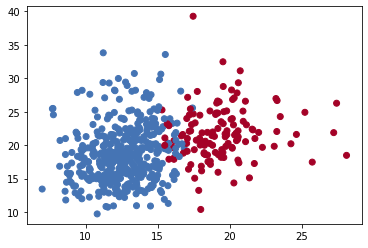

<Figure size 432x288 with 0 Axes>

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X = cancer.data
y= cancer.target

sc = StandardScaler()
x = sc.fit_transform(X)

centroids, labels = kmeans(X, k=2, centroids="kmeans++", tolerance=.01)
print(str(labels))
print(str(centroids))
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()
plt.savefig("nested-kmeans.png", dpi=200)

In [14]:
filt = y[labels==0]
if np.count_nonzero(filt == 1) > np.count_nonzero(filt == 0):
    labels = 1-labels

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y,labels)

array([[130,  82],
       [  1, 356]])

In [16]:
accuracy_score(y,labels)

0.8541300527240774

## Image applications of kmeans

Image segmentation is the classification of an image into different groups. Many researches have been done in the area of image segmentation using clustering. There are different methods and one of the most popular methods is k-means clustering algorithm. 

### Greyscale

In [45]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('lena_gray.jpg')
# convert image to numpy array
data = asarray(image)
data1 = asarray(image).flatten().reshape(data.shape[0]*data.shape[1],1)

In [46]:
%%time
k=4
centroids, labels = kmeans(data1, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
data1 = centroids[labels] # reassign all points

CPU times: user 3.75 s, sys: 54 ms, total: 3.8 s
Wall time: 3.78 s


In [51]:
img_.save("clustered_lena_gray.png")

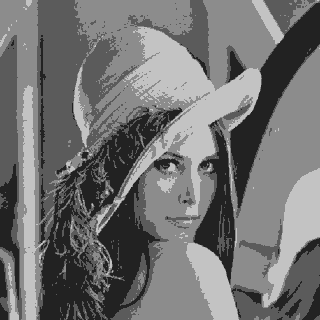

In [1]:
from IPython.display import Image
Image(filename='clustered_lena_gray.png')

### Color Image 

Firstly, a sample image is used for debugging and performance improvements. Eyes of Prof Terence Parr is used.

In [92]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('eyes.png')
# convert image to numpy array
data = asarray(image)
data1 = asarray(image).reshape(data.shape[0]*data.shape[1],3)

In [97]:
%%time
k=10
centroids, labels = kmeans(data1, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
data1 = centroids[labels] # reassign all points

CPU times: user 1.23 s, sys: 7 ms, total: 1.24 s
Wall time: 1.24 s


In [98]:
img_ = Image.fromarray(data1.reshape(data.shape[0],data.shape[1],3), 'RGB')
img_.show()

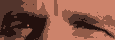

In [2]:
Image(filename='clustered_eyes.png')

Lenna or Lena is a standard test image widely used in the field of image processing since 1973.

In [67]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('lena_color.png')
# convert image to numpy array
data = asarray(image)
data1 = asarray(image).reshape(data.shape[0]*data.shape[1],data.shape[2])


In [68]:
%%time
k=10
centroids, labels = kmeans(data1, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
data1 = centroids[labels] # reassign all points

CPU times: user 1min 10s, sys: 449 ms, total: 1min 11s
Wall time: 1min 11s


In [69]:
img_ = Image.fromarray(data1.reshape(data.shape[0],data.shape[1],3), 'RGB')
img_.show()

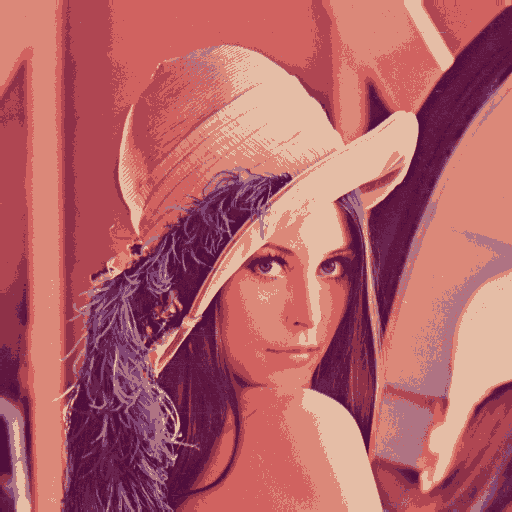

In [3]:
Image(filename='lena_color_clustered.png')

#### Cluster labels histogram.

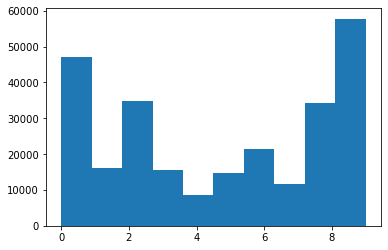

In [71]:
plt.hist(labels)
plt.show()

### Spectral Clustering

Spectral clustering is well known to relate to partitioning of a mass-spring system, where each mass is associated with a data point and each spring stiffness corresponds to a weight of an edge describing a similarity of the two related data points.

[1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1
 1 0 0 1 0 1 1 0 0 1 1 0 

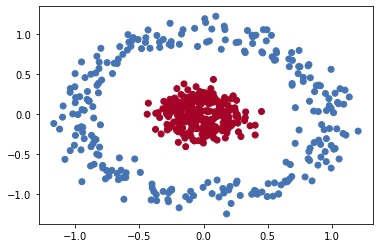

In [24]:
from sklearn.cluster import SpectralClustering
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
cluster = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
labels = cluster.fit_predict(X)  # pass X not similarity matrix

print(labels)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

### Density Based Clustering - DBSCAN

Since kmeans has some disadvanteges such as determining k and outliers, DBSCAN is a good alternative when k is unknown and there are some outliers. DenStream is an implementation of the unsupervised, density-based clustering algorithm of the same name. It is suitable for evolving data streams and based on the well-known clustering algorithm DBSCAN.

In [39]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [40]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


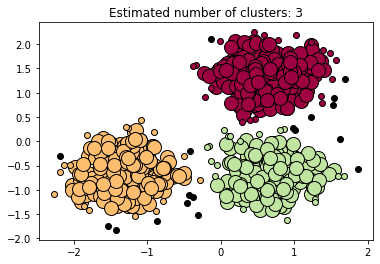

In [41]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### DenStream

In addition, DenStream is an Adaptive Density Data Stream Clustering Algorithm which is used for streaming data processing systems. Its mechanism allows to identify outliers and cluster numbers with the change of streaming data with the help of window frame.

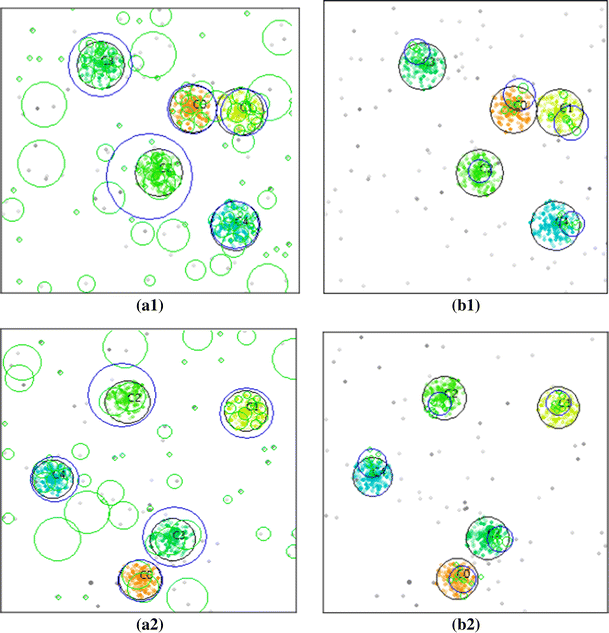

In [4]:
Image(filename='denstream.png')